In [1]:
import torch
import numpy as np
from PIL import Image
from mtcnn import *
from visualization_utils import *
import affine_transform as affine
from align_face import align_face

创建模型


In [2]:
mtcnn = MTCNN().eval()

声明检测方法

In [3]:
def detect(img):
    angles = [0, -90, 180]
    with torch.no_grad():
        for angle in angles:
            if angle != 0:
                img = img.rotate(angle, expand=1)
            bounding_boxes, landmarks = mtcnn(img, min_face_size=50, thresholds=(0.6, 0.7, 0.85))
            face_size = bounding_boxes.shape[0]
            if face_size > 0:
                break
    return img, bounding_boxes, landmarks

In [4]:
img, bounding_boxes,landmarks = detect(Image.open('images/22.jpg'))

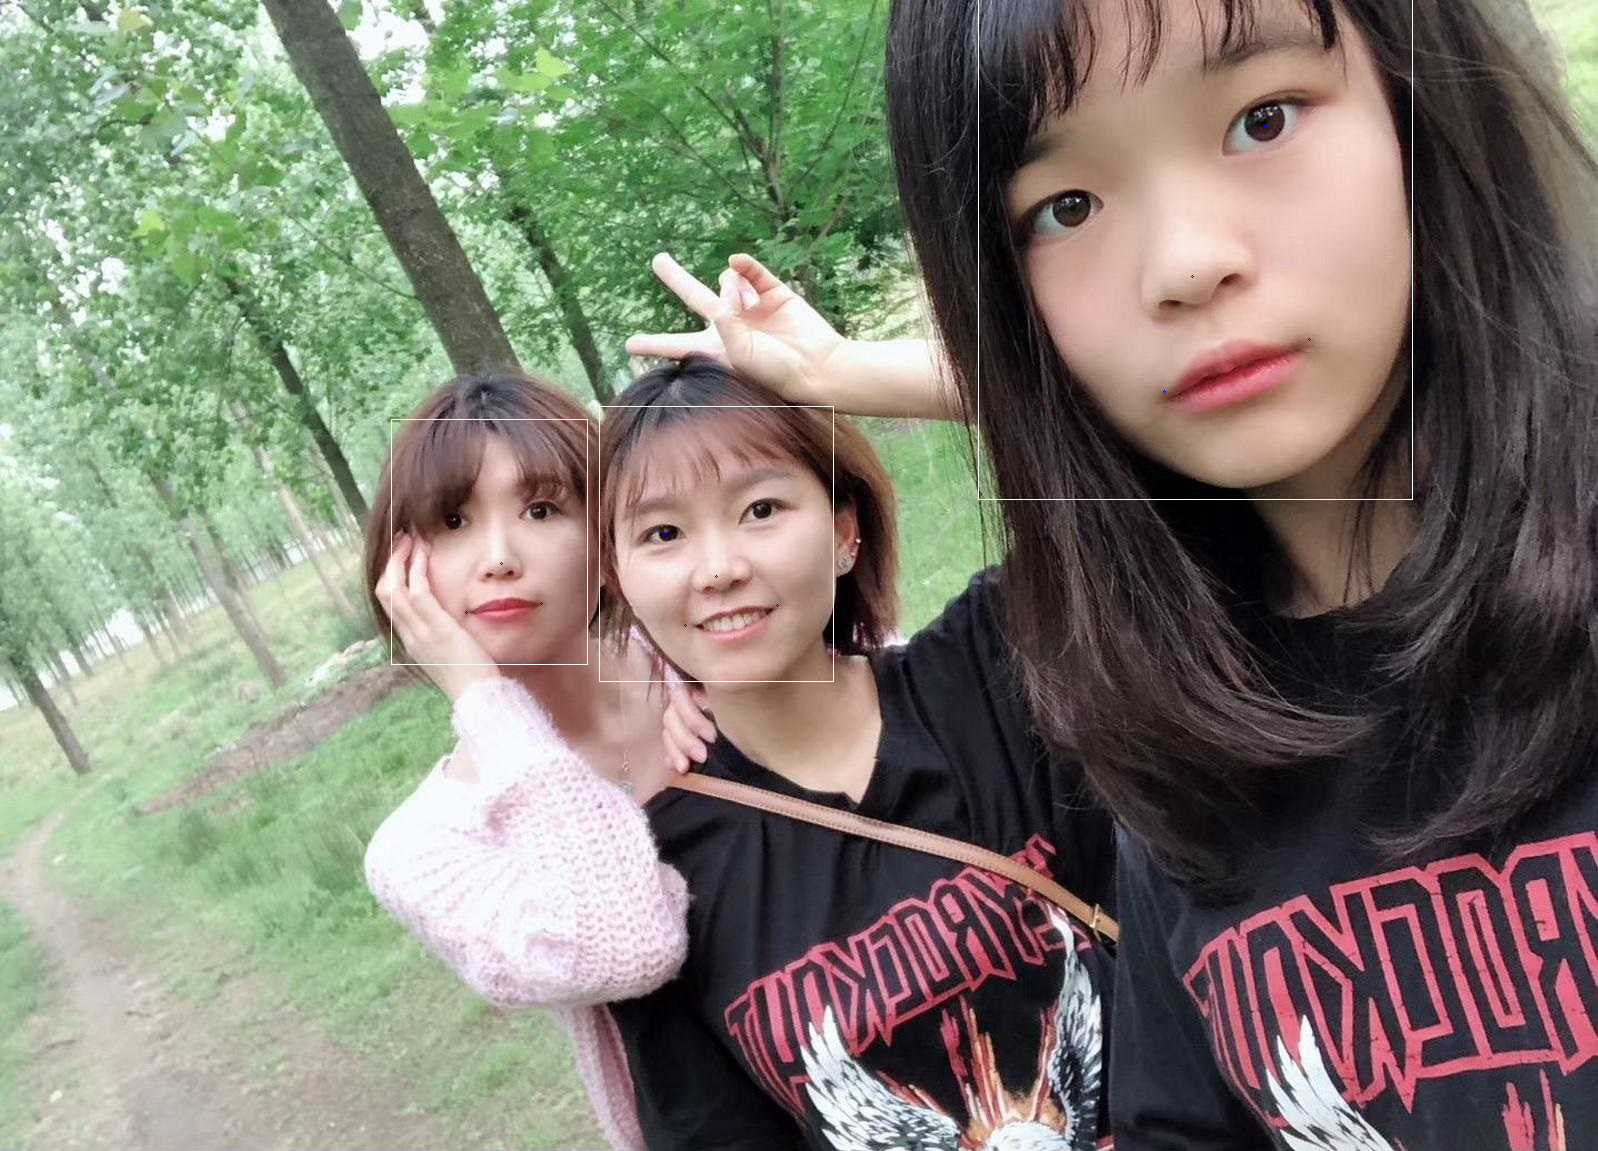

In [5]:
show_bboxes(img, bounding_boxes, landmarks)

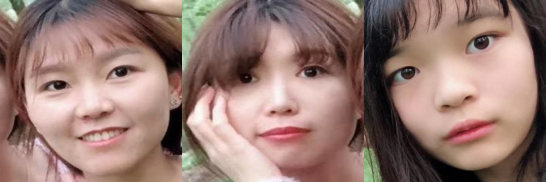

In [6]:
align_faces = align_face(img, bounding_boxes, detect_multiple_faces=True)
Image.fromarray(np.concatenate(align_faces, axis=1))

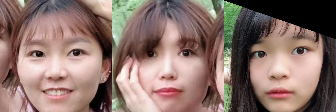

In [7]:
faces = affine.alignment(img, bounding_boxes, landmarks)
Image.fromarray(np.concatenate(faces, axis=1))